In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def rgb2gray(im):
    weights = np.c_[0.2989, 0.5870, 0.1140]
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)

#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# gray_img=rgb2gray(real_pandas)
# plt.imshow(gray_img, cmap=plt.cm.gray)

In [3]:
def cntrast(c, med, contrast_scale):
    if c>med:
        if c*(1+contrast_scale)>255:
            c=255
        else:
            c=int(c*(1+contrast_scale))
    else:
        c=int(c*(1-contrast_scale))
    return c

change_contrast=np.vectorize(cntrast,otypes=[np.int32])

In [4]:
def convert_to_grayscale(image, crop_left, crop_top, crop_right, crop_bottom, contrast_scale):
    #print(image.shape)
    #cropping
    l,w,h=image.shape
    newimage=image[crop_top:l-crop_bottom,crop_left:w-crop_right,:]
    #print(newimage.shape)
    #converting_to_grayscale
    gray_image=rgb2gray(newimage)
    #print(gray_image.shape)
    #increasing contrast
    med=np.median(gray_image)
    #print(med)
    fin_image=change_contrast(gray_image,med,contrast_scale)
    #print(fin_image.shape)
    return fin_image

## Step 4

In [5]:
data=ndimage.imread('data-behind-everything.jpg')

gray_data=convert_to_grayscale(data, 10, 50, 10, 50, 0.3)

In [6]:
gray_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

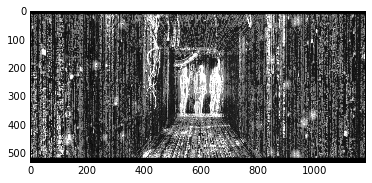

In [7]:
plt.imshow(gray_data,cmap=plt.cm.gray)